In [1]:
#%% 奇异值分解

import numpy as np

A = [[1, 0, 0, 0],
     [0, 0, 0, 4],
     [0, 3, 0, 0],
     [0, 0, 0, 0],
     [2, 0, 0, 0]]

u, s, vh = np.linalg.svd(A)
u, s, vh

(array([[ 0.        ,  0.        , -0.4472136 ,  0.        , -0.89442719],
        [-1.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        , -1.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ],
        [ 0.        ,  0.        , -0.89442719,  0.        ,  0.4472136 ]]),
 array([4.        , 3.        , 2.23606798, 0.        ]),
 array([[-0., -0., -0., -1.],
        [-0., -1., -0., -0.],
        [-1., -0., -0., -0.],
        [-0., -0., -1., -0.]]))

In [2]:
#%% 验证内积和迹的关系：inner<A, B> = tr(A.T @ B)
import numpy as np

A = np.arange(0,12).reshape((3, 4))
B = np.arange(12,24).reshape((3, 4))

product = sum((A*B).reshape((1,12)))
tr = np.trace(A.T @ B)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


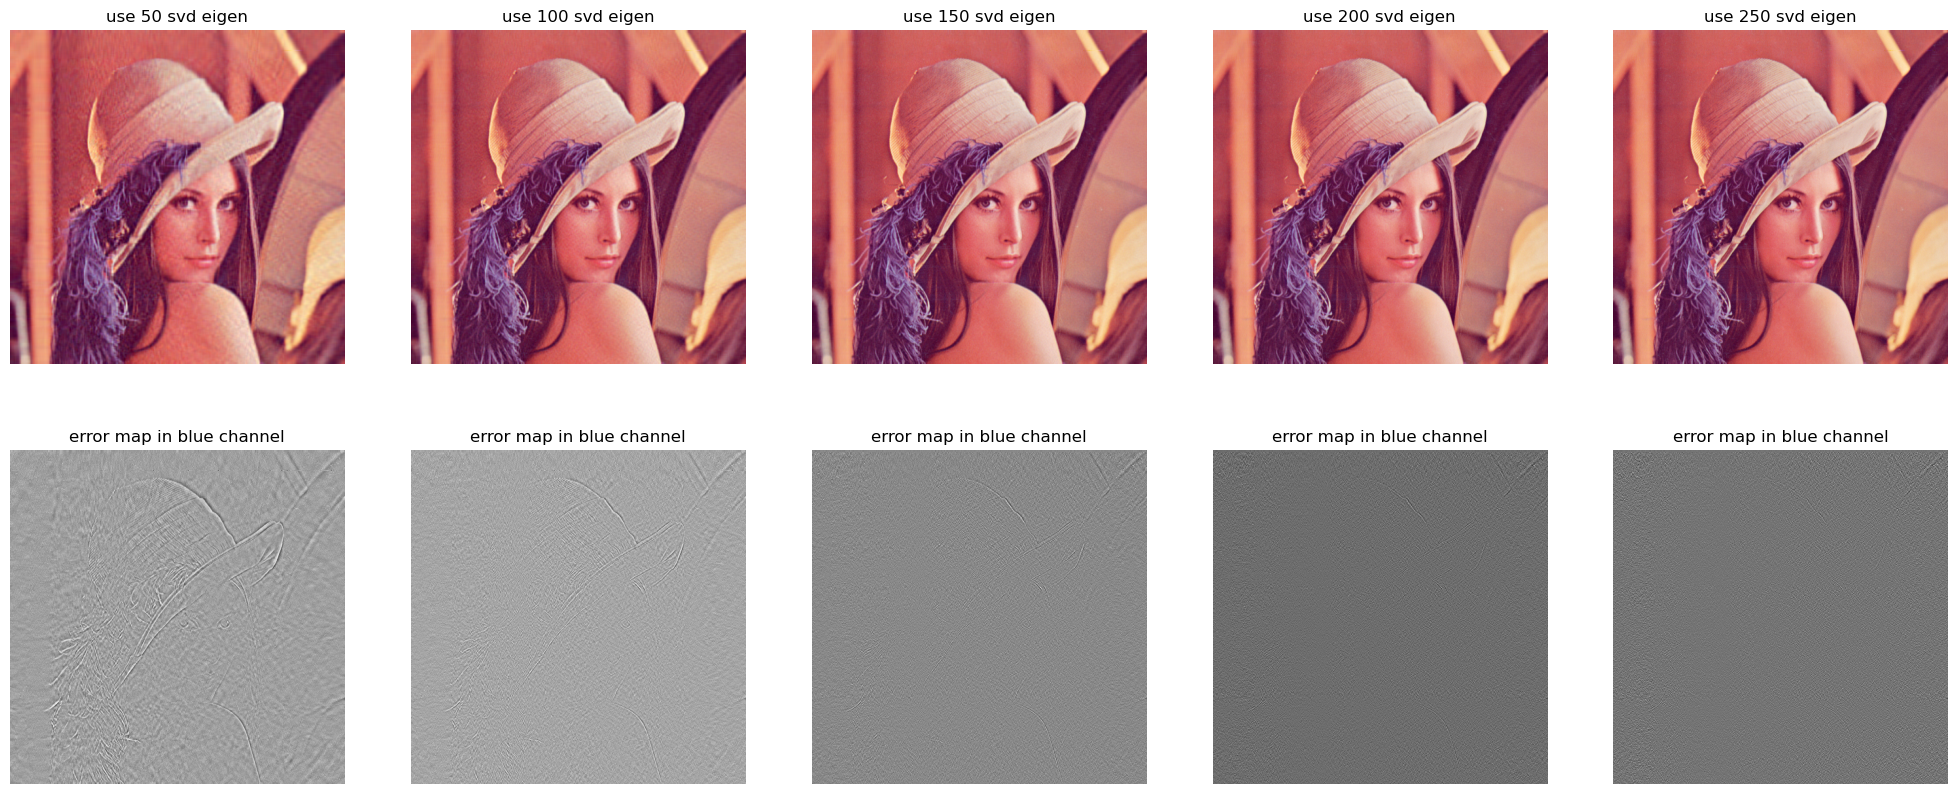

In [3]:
#%% 对图像进行SVD分解
# reference: https://mp.weixin.qq.com/s/upc8yNRhs4SJtDHYzGEQIg

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image

img = image.imread("../data/lena.png")
row, col = 2, 5
plt.figure(figsize = (25, 10))  # 设置整个画布的大小

# 分别使用eigen_num个特征值，对SVD分解后的图像进行恢复
for img_index in np.arange(1, 6):
    # 对RGB三个不同的通道分别进行SVD分解，再分别进行恢复
    recover = []
    eigen_num = img_index * 50
    for channel in [0, 1, 2]:
        # 矩阵分解
        U, s, V = np.linalg.svd(img[:, :, channel])   # s是特征值列表
        S = np.zeros((U.shape[1], V.shape[0]))
        for i in np.arange(0, eigen_num):
            S[i, i] = s[i]
        # 恢复为原来的矩阵
        recover_result = U @ S @ V
        recover.append(recover_result)

    recover_img = np.stack(recover, axis = 2)
    recover_img[ recover_img >= 255] = 255
    recover_img[ recover_img <= 0] = 0
    recover_img = recover_img

    # 绘制恢复后的图像
    plt.subplot(row, col, img_index)
    plt.axis("off")
    plt.title("use {} svd eigen".format(eigen_num))
    plt.imshow(recover_img)

    # 绘制误差图
    plt.subplot(row, col, img_index + col)
    plt.axis("off")
    plt.title("error map in blue channel".format(eigen_num))
    plt.imshow(255 - (img[:, :, 2] - recover_img[:, :, 2]), cmap = 'Greys')

plt.subplots_adjust()
plt.show()
